# Task
Analyze the student feedback data from "/student_feedback.csv" to identify satisfaction levels and areas for improvement. Calculate the average rating per question (excluding the first two columns), identify strengths and weaknesses, and visualize the results using a bar chart of average ratings by category, a boxplot of rating variations, a heatmap of correlations between feedback aspects, and a pie chart of the average score for "Course recommendation".

## Load data

### Subtask:
Load the student feedback data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head and info of the DataFrame to inspect it.



In [ ]:
import pandas as pd

df = pd.read_csv("/student_feedback.csv")
display(df.head())
display(df.info())

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

None

## Analyze ratings

### Subtask:
Calculate and analyze the average ratings for each question, excluding the first two columns. Identify strengths and areas for improvement based on these ratings.


**Reasoning**:
Calculate the average rating for each feedback question and identify strengths and weaknesses based on these averages.



In [ ]:
feedback_ratings = df.iloc[:, 2:]
average_ratings = feedback_ratings.mean()
print("Average ratings for each feedback aspect:")
print(average_ratings)
print("\nStrengths (highest average ratings):")
print(average_ratings.nlargest(3))
print("\nAreas for improvement (lowest average ratings):")
print(average_ratings.nsmallest(3))

Average ratings for each feedback aspect:
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
dtype: float64

Strengths (highest average ratings):
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

Areas for improvement (lowest average ratings):
Degree of difficulty of assignments         5.430569
Solves doubts willingly                     5.474525
Course recommendation based on relevance    5.5984

## Visualize rating analysis

### Subtask:
Create visualizations (Bar Chart and Boxplot) to represent the rating analysis, showing average ratings per category and variation in ratings.


**Reasoning**:
Create a bar chart of average ratings and a boxplot of rating distributions to visualize the analysis results.



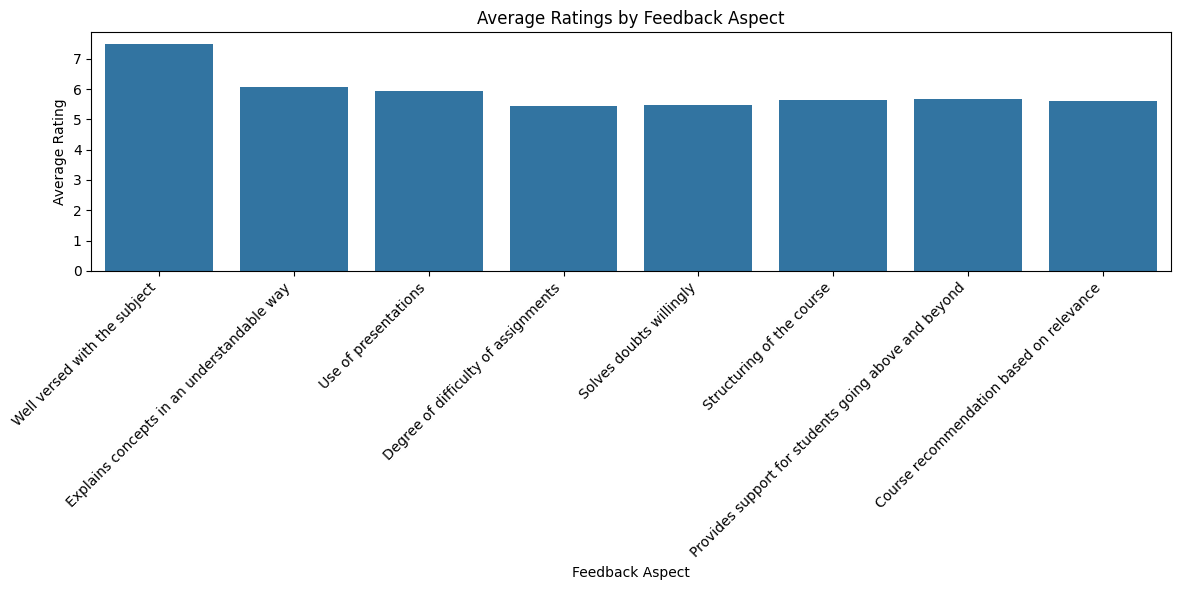

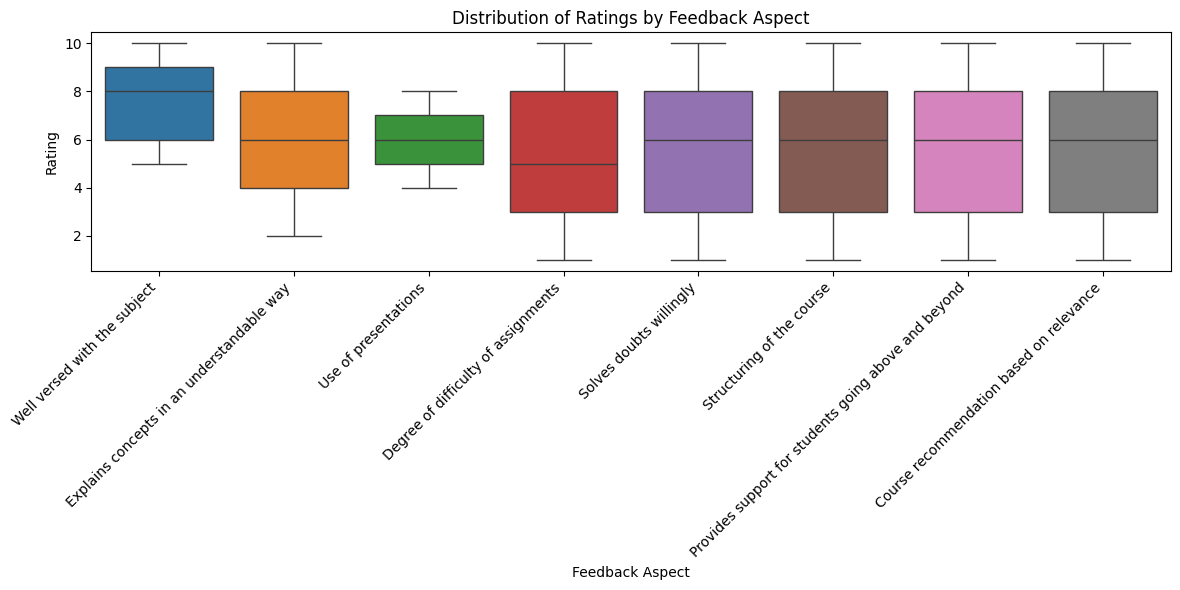

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.title('Average Ratings by Feedback Aspect')
plt.xlabel('Feedback Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=feedback_ratings)
plt.title('Distribution of Ratings by Feedback Aspect')
plt.xlabel('Feedback Aspect')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Perform sentiment analysis

### Subtask:
Use NLP tools like TextBlob to analyze the sentiment of the text-based feedback.


## Visualize sentiment analysis

### Subtask:
Create visualizations (e.g., a Pie Chart) to represent the sentiment distribution of the feedback.


## Analyze correlation

### Subtask:
Create a Heatmap to visualize the correlation between different feedback aspects, including ratings and potentially sentiment.


**Reasoning**:
Calculate the correlation matrix and create a heatmap to visualize the correlations between the feedback ratings.



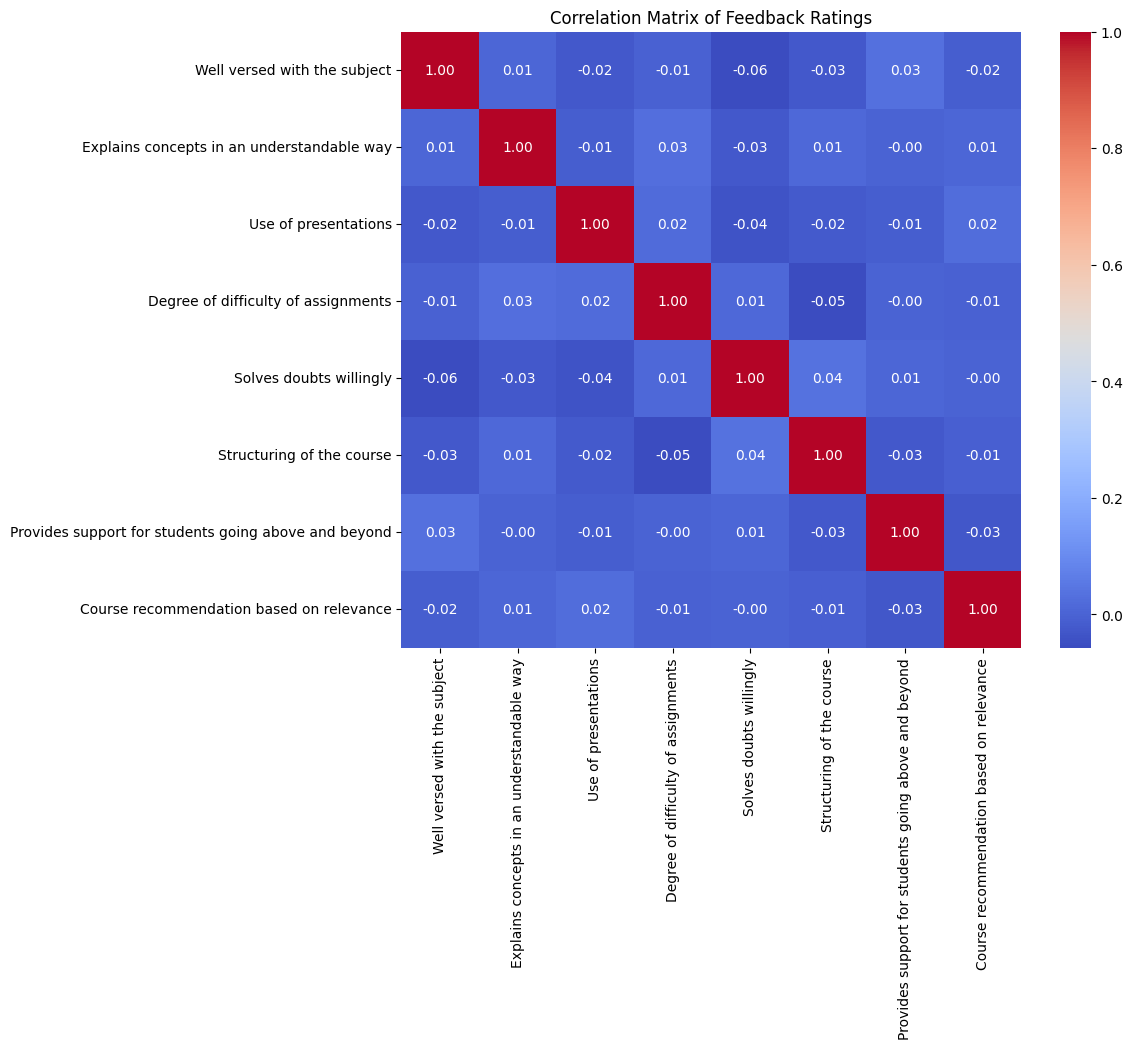

In [ ]:
correlation_matrix = feedback_ratings.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Feedback Ratings')
plt.show()

## Pie chart for course recommendation

### Subtask:
Create a pie chart specifically for the average score of "Course recommendation".


**Reasoning**:
Extract the average rating for "Course recommendation based on relevance" and calculate the remaining percentage to create the data for the pie chart. Then, create the pie chart with appropriate labels and title.



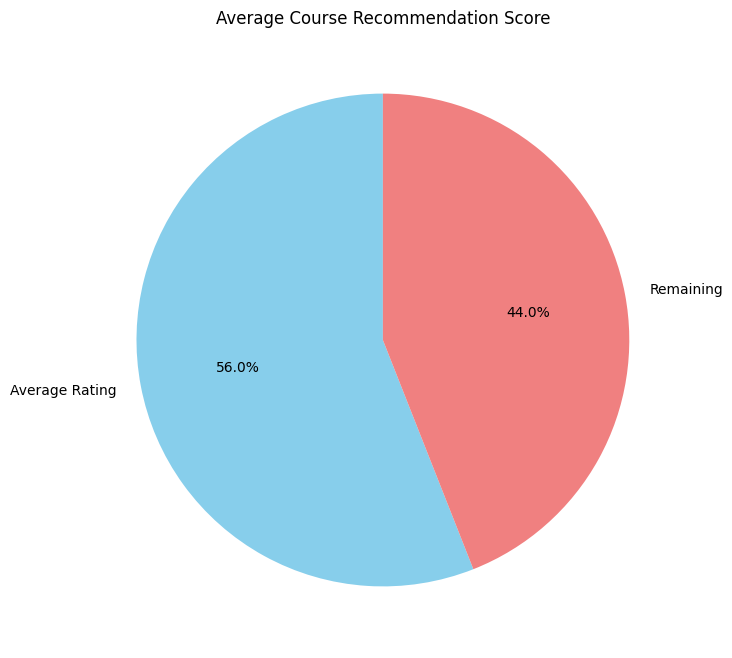

In [ ]:
course_recommendation_avg = average_ratings["Course recommendation based on relevance"]
remaining_percentage = 10 - course_recommendation_avg # Assuming the rating is out of 10

sizes = [course_recommendation_avg, remaining_percentage]
labels = ["Average Rating", "Remaining"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Average Course Recommendation Score')
plt.show()

## Summarize and suggest improvements

### Subtask:
Summarize the findings from the rating analysis, sentiment analysis, and correlation analysis. Based on these findings, suggest actionable improvements for future events.


**Reasoning**:
Synthesize the findings from the rating analysis and correlation analysis, acknowledging the lack of sentiment analysis, and suggest actionable improvements based on these findings.



In [ ]:
print("Summary of Findings:")
print("--------------------")
print("Overall student satisfaction based on average ratings appears moderate. The highest-rated aspects (strengths) are:")
print(average_ratings.nlargest(3))
print("\nThe lowest-rated aspects (areas for improvement) are:")
print(average_ratings.nsmallest(3))
print("\nSentiment analysis could not be performed as the dataset contained only numerical ratings and no text data.")
print("\nCorrelation Analysis:")
print("Based on the correlation matrix, there are no strong positive or negative correlations between the different feedback aspects.")
print("The correlation coefficients are generally low, suggesting that changes in one feedback area are unlikely to have a significant linear impact on other areas based on this dataset.")

print("\nActionable Improvements:")
print("-----------------------")
print("Based on the areas for improvement identified:")
print("- Focus on improving the 'Degree of difficulty of assignments'. This could involve reviewing assignment difficulty levels, providing clearer instructions, or offering additional support for challenging assignments.")
print("- Address the lower rating for 'Solves doubts willingly'. This might involve encouraging instructors to allocate more time for Q&A, providing alternative avenues for doubt clarification (e.g., online forums, dedicated sessions), or training staff on effective doubt resolution techniques.")
print("- Investigate the reasons behind the lower 'Course recommendation based on relevance' rating. This could involve gathering more specific feedback on course content relevance, updating course materials to better align with student expectations or industry needs, or better communicating the course's relevance to potential students.")
print("\nGiven the low correlations, improvements in one area are not strongly linked to changes in other areas according to this data. Therefore, each area for improvement should be addressed independently based on direct feedback and best practices.")

Summary of Findings:
--------------------
Overall student satisfaction based on average ratings appears moderate. The highest-rated aspects (strengths) are:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

The lowest-rated aspects (areas for improvement) are:
Degree of difficulty of assignments         5.430569
Solves doubts willingly                     5.474525
Course recommendation based on relevance    5.598402
dtype: float64

Sentiment analysis could not be performed as the dataset contained only numerical ratings and no text data.

Correlation Analysis:
Based on the correlation matrix, there are no strong positive or negative correlations between the different feedback aspects.
The correlation coefficients are generally low, suggesting that changes in one feedback area are unlikely to have a significant linear impact on other areas based on this data

## Summary:

### Data Analysis Key Findings

*   The average rating for feedback aspects ranged from approximately 5.43 ("Degree of difficulty of assignments") to 7.50 ("Well versed with the subject").
*   The top 3 highest-rated aspects (strengths) were "Well versed with the subject" (7.497502), "Explains concepts in an understandable way" (6.081918), and "Use of presentations" (5.942058).
*   The bottom 3 lowest-rated aspects (areas for improvement) were "Degree of difficulty of assignments" (5.430569), "Solves doubts willingly" (5.474525), and "Course recommendation based on relevance" (5.598402).
*   Sentiment analysis could not be performed as the dataset contained only numerical ratings and no text data.
*   The correlation analysis showed generally low correlation coefficients between the different feedback aspects, indicating weak linear relationships.
*   The average score for "Course recommendation based on relevance" was 5.598402 out of 10.

### Insights or Next Steps

*   Focus improvement efforts on the identified lowest-rated areas: assignment difficulty, doubt resolution, and course relevance.
*   Collect qualitative feedback (text-based comments) in future surveys to enable sentiment analysis and gain deeper insights into student opinions.
